### prompt-delayed-time cube

In [1]:
TCanvas *c1 = new TCanvas;

In [2]:
/*
TFile *opf = new TFile("prompt_delayed_time_cube.root","RECREATE");
    
ifstream ifs("/data/d3/zhangjizhi/MNT/validID.txt");
int runid;
TH3F *pdt = new TH3F("pdt","prompt-delayed-time cube",1500,0,1500,1500,0,1500,100,0,1000);//x:prompt y:delayed z:time
while (ifs>>runid){
    TFile *ipf = new TFile(Form("/data/d3/zhangjizhi/MNT/MATRIX/promptdelaytime/pdtmat%04d.root",runid));
    TH3F *buf = (TH3F*)ipf->Get("pdt");
    pdt->Add(pdt,buf);
    delete buf;
}
    
opf->Write(NULL, TObject::kOverwrite);
opf->Close();
*/

In [3]:
TFile *ipf = new TFile("prompt_delayed_time_cube.root","read");
TH3F *pdt = (TH3F*)ipf->Get("pdt");

In [4]:
double prompt[7]  = {143.9,328.,349.,509.9,849.,1164.,1215.};
double delayed[6] = {340.8,363.0,787.1,818.6,1048.0,1235.2};

![136Ba_level_scheme](../img/136Ba_level_scheme.png)

### 136Ba 10+ isomer 半衰期

In [5]:
TH1D *ht = new TH1D("time","time distribution",100,0,1000);
int wid1 = 1;

In [6]:
for (int i=0; i<7; i++)           //prompt
    for (int j=0; j<6; j++){      //delayed
        int pbin = pdt->GetXaxis()->FindBin(prompt[i]);
        int dbin = pdt->GetYaxis()->FindBin(delayed[j]);
        TH1D *htbuf = pdt->ProjectionZ(Form("%d %d",(int)prompt[i],(int)delayed[j]), pbin-wid1, pbin+wid1, dbin-wid1, dbin+wid1);
        ht->Add(ht,htbuf);
    }

In [7]:
TF1 *f1 = new TF1("f1","[0]*TMath::Exp(-[1]*x)",120,350);

 FCN=74.9341 FROM MIGRAD    STATUS=CONVERGED      68 CALLS          69 TOTAL
                     EDM=1.21806e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.63753e+03   1.00414e+02   1.19088e-01  -1.26346e-05
   2  p1           7.29536e-03   1.29759e-04   1.53864e-07   6.73619e+00


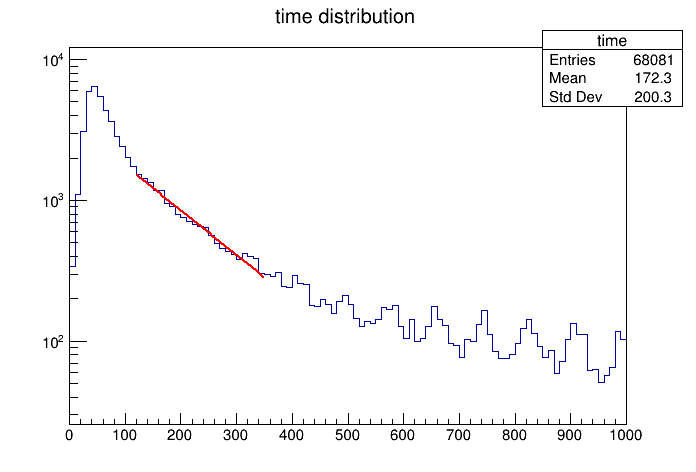

In [8]:
f1->SetParameter(0,1e4);
f1->SetParameter(1,0.0077);
ht->Fit("f1","R");
ht->Draw();
c1->SetLogy();
c1->Draw();

In [9]:
printf("10+ isomer half life: %.2f +- %.2f ns",
       log(2)/f1->GetParameter(1),log(2)/f1->GetParameter(1)/f1->GetParameter(1)*f1->GetParError(1));

10+ isomer half life: 95.01 +- 1.69 ns

### 二维投影谱：prompt-delayed matrix (y-prompt x-delayed)

In [10]:
TH2D *pdmat;
pdt->Project3D("xy");
pdmat = (TH2D*)gROOT->FindObject("pdt_xy");

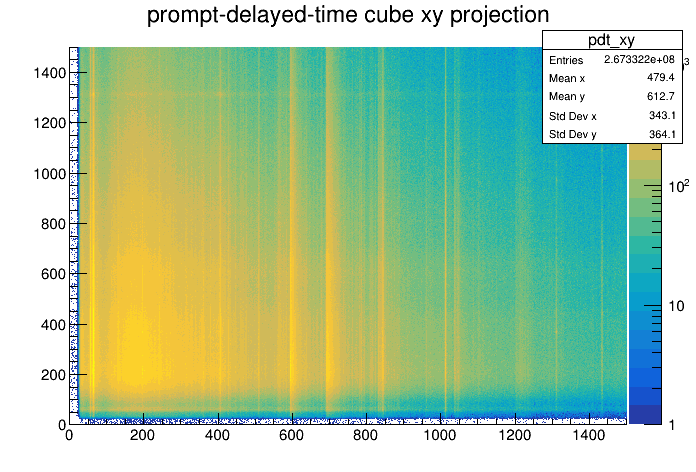

In [11]:
pdmat->Draw("colz");
c1->SetLogy(0);
c1->SetLogz();
c1->Draw();

#### 载入函数

In [12]:
%jsroot on
gROOT->ProcessLine(".L bgsub.C");
gROOT->ProcessLine(".L bgsub_radware.C");
gROOT->ProcessLine(".L gate.C");
gROOT->ProcessLine(".L draw_peaks.C");

### 观察峰位附近情况

In [13]:
TH1D *hp1 = pdmat->ProjectionY("hp1");
hp1 = bgsub(hp1);

TH1D *hd1 = pdmat->ProjectionX("hd1");
hd1 = bgsub(hd1);

int num;

#### prompt: 144, 328, 349, 510, 849, 1164, 1215（1215 keV 难以辨认，不用）

In [14]:
num = 6;
hp1->SetAxisRange(prompt[num]-20,prompt[num]+20,"X");
hp1->Draw();
c1->Draw();

#### delayed: 340.8, 363.0, 787.1, 818.6, 1048.0, 1235.2

In [15]:
num = 5;
hd1->SetAxisRange(delayed[num]-20,delayed[num]+20,"X");
hd1->Draw();
c1->Draw();

### 136Ba prompt delayed 互相开窗

In [16]:
TH1D *hdelay = new TH1D("hd","delayed gamma gated on prompt",1500,0,1500);
TH1D *hdbuf;

In [17]:
hdbuf = gate(pdmat, prompt[0], 1, -4, -4, 3, 3, 'X');//2
hdelay->Add(hdelay,hdbuf);

hdbuf = gate(pdmat, prompt[1], 1, -14, -14, 6, 6, 'X');
hdelay->Add(hdelay,hdbuf);

hdbuf = gate(pdmat, prompt[2], 1, -15, -15, 5, 5, 'X');//2
hdelay->Add(hdelay,hdbuf);

hdbuf = gate(pdmat, prompt[3], 1, -9, -9, 13, 13, 'X');
hdelay->Add(hdelay,hdbuf);

hdbuf = gate(pdmat, prompt[4], 1, -14, -14, 17, 17, 'X');
hdelay->Add(hdelay,hdbuf);

hdbuf = gate(pdmat, prompt[5], 1, -13, -13, 18, 18, 'X');
hdelay->Add(hdelay,hdbuf);

In [18]:
TH1D *hprompt = new TH1D("hp","prompt gamma gated on delayed",1500,0,1500);
TH1D *hpbuf;

hpbuf = gate(pdmat, delayed[0], 1, -5, -4, 5, 6, 'Y');//2
hprompt->Add(hprompt,hpbuf);

hpbuf = gate(pdmat, delayed[1], 1, -18, -17, 6, 7, 'Y');
hprompt->Add(hprompt,hpbuf);

hpbuf = gate(pdmat, delayed[2], 1, -9, -8, 13, 14, 'Y');//2
hprompt->Add(hprompt,hpbuf);

hpbuf = gate(pdmat, delayed[3], 1, -18, -17, 10, 11, 'Y');
hprompt->Add(hprompt,hpbuf);

hpbuf = gate(pdmat, delayed[4], 1, -16, -15, 19, 20, 'Y');//2
hprompt->Add(hprompt,hpbuf);

hpbuf = gate(pdmat, delayed[5], 1, -16, -15, 19, 20, 'Y');//2
hprompt->Add(hprompt,hpbuf);

In [19]:
draw_peaks(hdelay,4);

#### 文献中的对应图

![136Ba_prompt_delayed_gated_spectrum](../img/136Ba_prompt_delayed_gated_spectrum.png)

In [20]:
draw_peaks(hprompt);